Since the HW grading is done in a semi-automatic manner, please adhere to the following naming format for your submission.
Each group of students (mostly pairs, with some approved exceptions) should submit a Jupyter notebook (.ipynb file and not a .zip file) whose name is the underscored-separated id list of all the submitters. 
For example, for two submitters, the naming format is: id1_id2.ipynb.

# Question 1

In [28]:
import pandas as pd
import numpy as np
df = pd.read_csv("Boston1.csv")

In [29]:
# Exploring the data:
print("Shape:",df.shape)
print(f"Features: {df.columns.tolist()}")

Shape: (506, 16)
Features: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv', 'randCol', 'misData']


a) Download the "Boston1.csv" database, and explore the data. Explanation about the dataset can be found here: http://www.clemson.edu/economics/faculty/wilson/R-tutorial/analyzing_data.html

Find the columns with missing values and filter them out of the data.

In [30]:
df = df.dropna(axis=1) # droping columns with missing values

b) Divide the filtered data randomly into a train set (70% of the data) and test set (30% of the data).

In [31]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size=0.3)

# Question 2

If you haven't done this previously, install the scikit-learn package for python.

a) On the train set, run a linear regression model as follows:
Divide the training set into explanatory variables (the X matrix with which we'll try to make a prediction) and a target variable (y, the value which we'll try to predict). Use the 'medv' attribute as the target variable y and the rest of the features as the X matrix. Run a linear regression model on those sets, and print the regression coefficients. 

In [32]:
from sklearn.linear_model import LinearRegression
train_y = train_set["medv"]
train_X = train_set.drop(columns=["medv"])
model = LinearRegression()
model.fit(train_X.values,train_y)
model.coef_


array([-6.89536546e-02,  5.89864781e-02,  1.02655350e-02,  2.68153325e+00,
       -1.41618865e+01,  3.36849123e+00, -2.07096816e-03, -1.59933579e+00,
        3.15579696e-01, -1.27807108e-02, -8.88464746e-01,  1.03431797e-02,
       -6.28126757e-01,  9.50488916e-01])

b) Use the linear regression model to predict the values of the test set's 'medv' column, based on the test set's other attributes. Print the Mean Squared Error of the model on the train set and on the test set.
Usually, the MSE on the train set would be lower than the MSE on the test set, since the model parameters are optimized with respect to the train set. Must this always be the case? Can you think of a few examples for when this might not be the case?

In [33]:
from sklearn.metrics import mean_squared_error as mse
test_y = test_set["medv"]
test_X = test_set.drop(columns=["medv"])
prediction_on_test = model.predict(test_X.values)
prediction_on_train = model.predict(train_X.values)
    
print(f"MSE(Train set)={mse(prediction_on_train,train_y)}")
print(f"MSE(Test set)={mse(prediction_on_test,test_y)}")

MSE(Train set)=23.217880052825574
MSE(Test set)=20.123314497718766


<u>Is the MSE on the test set is always lower then MSE on the train set?</u> </br>
It is possible that the train dataset's MSE is higher than the test dataset's MSE, since it's possible that the train data isn't realizable by linear regression - so it's not 0 - and by a chance, the test data only contains entries that fit exactly on the linear regression line. For example, see the code + outcome below:

In [41]:
# An un-realizable train data
example_train_data = pd.DataFrame({'X': [1, 2, 3], 'Y': [1, 4, 1]})
example_X_train = example_train_data.drop('Y', axis=1)
example_y_train = example_train_data['Y']

example_regression_model = LinearRegression()
example_regression_model.fit(example_X_train, example_y_train)

# A "perfect" test data
example_test_data = pd.DataFrame({'X': range(100), 'Y': 100 * [2]})
example_X_test = example_test_data.drop('Y', axis=1)
example_y_test = example_test_data['Y']

example_y_hat_train = example_regression_model.predict(example_X_train)
example_train_MSE = mse(example_y_train, example_y_hat_train)

example_y_hat_test = example_regression_model.predict(example_X_test)
example_test_MSE = mse(example_y_test, example_y_hat_test)
pd.DataFrame({'Set': ['train_set', 'test_set'], 'MSE': [example_train_MSE, example_test_MSE]})

,Set,MSE
0,train_set,2.000000e+00
1,test_set,1.720373e-28


c) Add some noise (with mean=0, std=1) to the test set's y, and predict it again. What happened to the MSE? Why?

In [35]:
noise = np.random.normal(loc=0,scale=1,size=len(test_y.values))
noised_test_y = test_y+noise
print(f"MSE(Noised test set) = {mse(prediction_on_test,noised_test_y)}")

MSE(Noised test set) = 21.073748848012876


The MSE increased by a little bit.
That's because we increased the distance from the linear model by increasing the desired output. The impact of the added noise on the MSE  is negligible becuase the std is somehow small compared to the std of the real disribution of the data

# Question 3

a) Create a Recursive feature elimination model, with a linear regression estimator, that selects half of the original number of features. Hint: Check the feature_selection module in scikit-learn.

In [36]:
from sklearn.feature_selection import RFE
rfe = RFE(model)

b) Use the feature elimination model on the full database (after filtering columns with missing values, before partitioning into train/test). Print the features that were selected. Remember that we separate the 'medv' attribute to be our y, while the rest of the attributes in the dataset serve as features to learn from.

In [37]:
X = df.drop(columns=["medv"])
y = df["medv"]
rfe_model = rfe.fit(X.values,y)
X.columns[rfe_model.get_support()].tolist()

['chas', 'nox', 'rm', 'dis', 'ptratio', 'lstat', 'randCol']

c) We'd like to find out the optimal number of features. Create feature elimination models (with linear regression estimators) for every number of features between 1 and n (where n = all the original features, 'medv' excluded). For each number of features, run a linear regression as in Question 2, only on the selected features, in order to predict 'medv'. Print the Mean Sqaured Error for each number of features.

In [38]:
mse_i_list = list()
features_number =  len(df.columns) -1
for i in range(1,features_number+1):
    rfe_i = RFE(model,n_features_to_select=i)
    rfe_model = rfe_i.fit(X.values,y)
    selected_features = train_X.columns[rfe_model.get_support()].tolist()
    selected_X = train_X.reindex(columns = selected_features)
    model.fit(selected_X.values,train_y) 
    selected_X_test = test_X.reindex(columns = selected_features)
    mse_i = mse(model.predict(selected_X_test.values),test_y)
    mse_i_list.append(mse_i)
    print("MSE for",i,"selected features: ",mse_i)


MSE for 1 selected features:  56.87282127976878
MSE for 2 selected features:  30.982927152649093
MSE for 3 selected features:  29.477808486186238
MSE for 4 selected features:  23.44258183509568
MSE for 5 selected features:  22.545306880080595
MSE for 6 selected features:  20.733116007421653
MSE for 7 selected features:  20.85411885972767
MSE for 8 selected features:  21.187574013197235
MSE for 9 selected features:  20.068925642197
MSE for 10 selected features:  20.029387187011245
MSE for 11 selected features:  20.70052181763582
MSE for 12 selected features:  20.313665557276416
MSE for 13 selected features:  20.11111979791632
MSE for 14 selected features:  20.123314497718766


d) Conclude the optimal number of features for this task. Think about the cost of adding for data vs the benefit of a more accurate prediction. Explain your answer.

Text(0, 0.5, 'MSE')

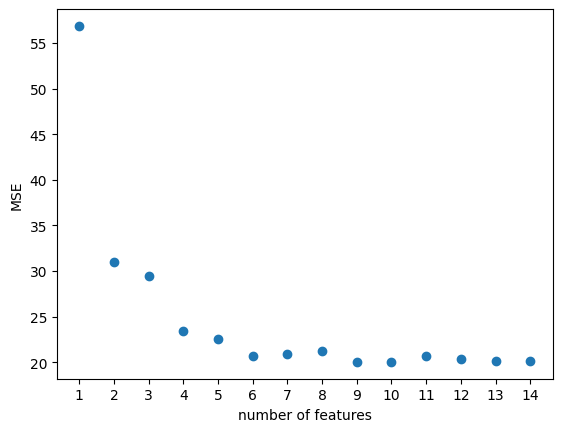

In [39]:
import matplotlib.pyplot as plt 
plt.scatter(range(1,features_number+1),mse_i_list)
plt.xticks(range(1,features_number+1,1))
plt.xlabel("number of features")
plt.ylabel("MSE")

We can see that the MSE achieved from 6 features isn't changing that much after adding more features. therefore 6 is the optimal number of features. </br>
By eliminating irrelevant features, we cam improve the model's performance -  reduce overfitting, enhance interpretability, and speed up inference times.

# Question 4

Perform a cross-validation of the linear regression on the train set with K=5. Print the CV scores for each repeat.

In [40]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(model, train_X, train_y, cv=5))

[0.77128718 0.74924982 0.55008553 0.57463221 0.75000391]
